In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

>>> STEP 7: ANALYZING DEMOGRAPHICS & COMPLICATIONS...
   -> Complication Multiplier: 2.3x (Complicated cases are 2.3 times more expensive).
   -> Gender Gap: Treating females costs 6,375 SAR more per year.


C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_12896\548989177.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(data=df_comp_status, x='Status', y='Cost_SAR', palette=['#a8dadc', '#e63946'], ax=ax1)
C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_12896\548989177.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(data=df_gender, x='Gender', y='Cost_SAR', palette=['#457b9d', '#d62828'], ax=ax2)


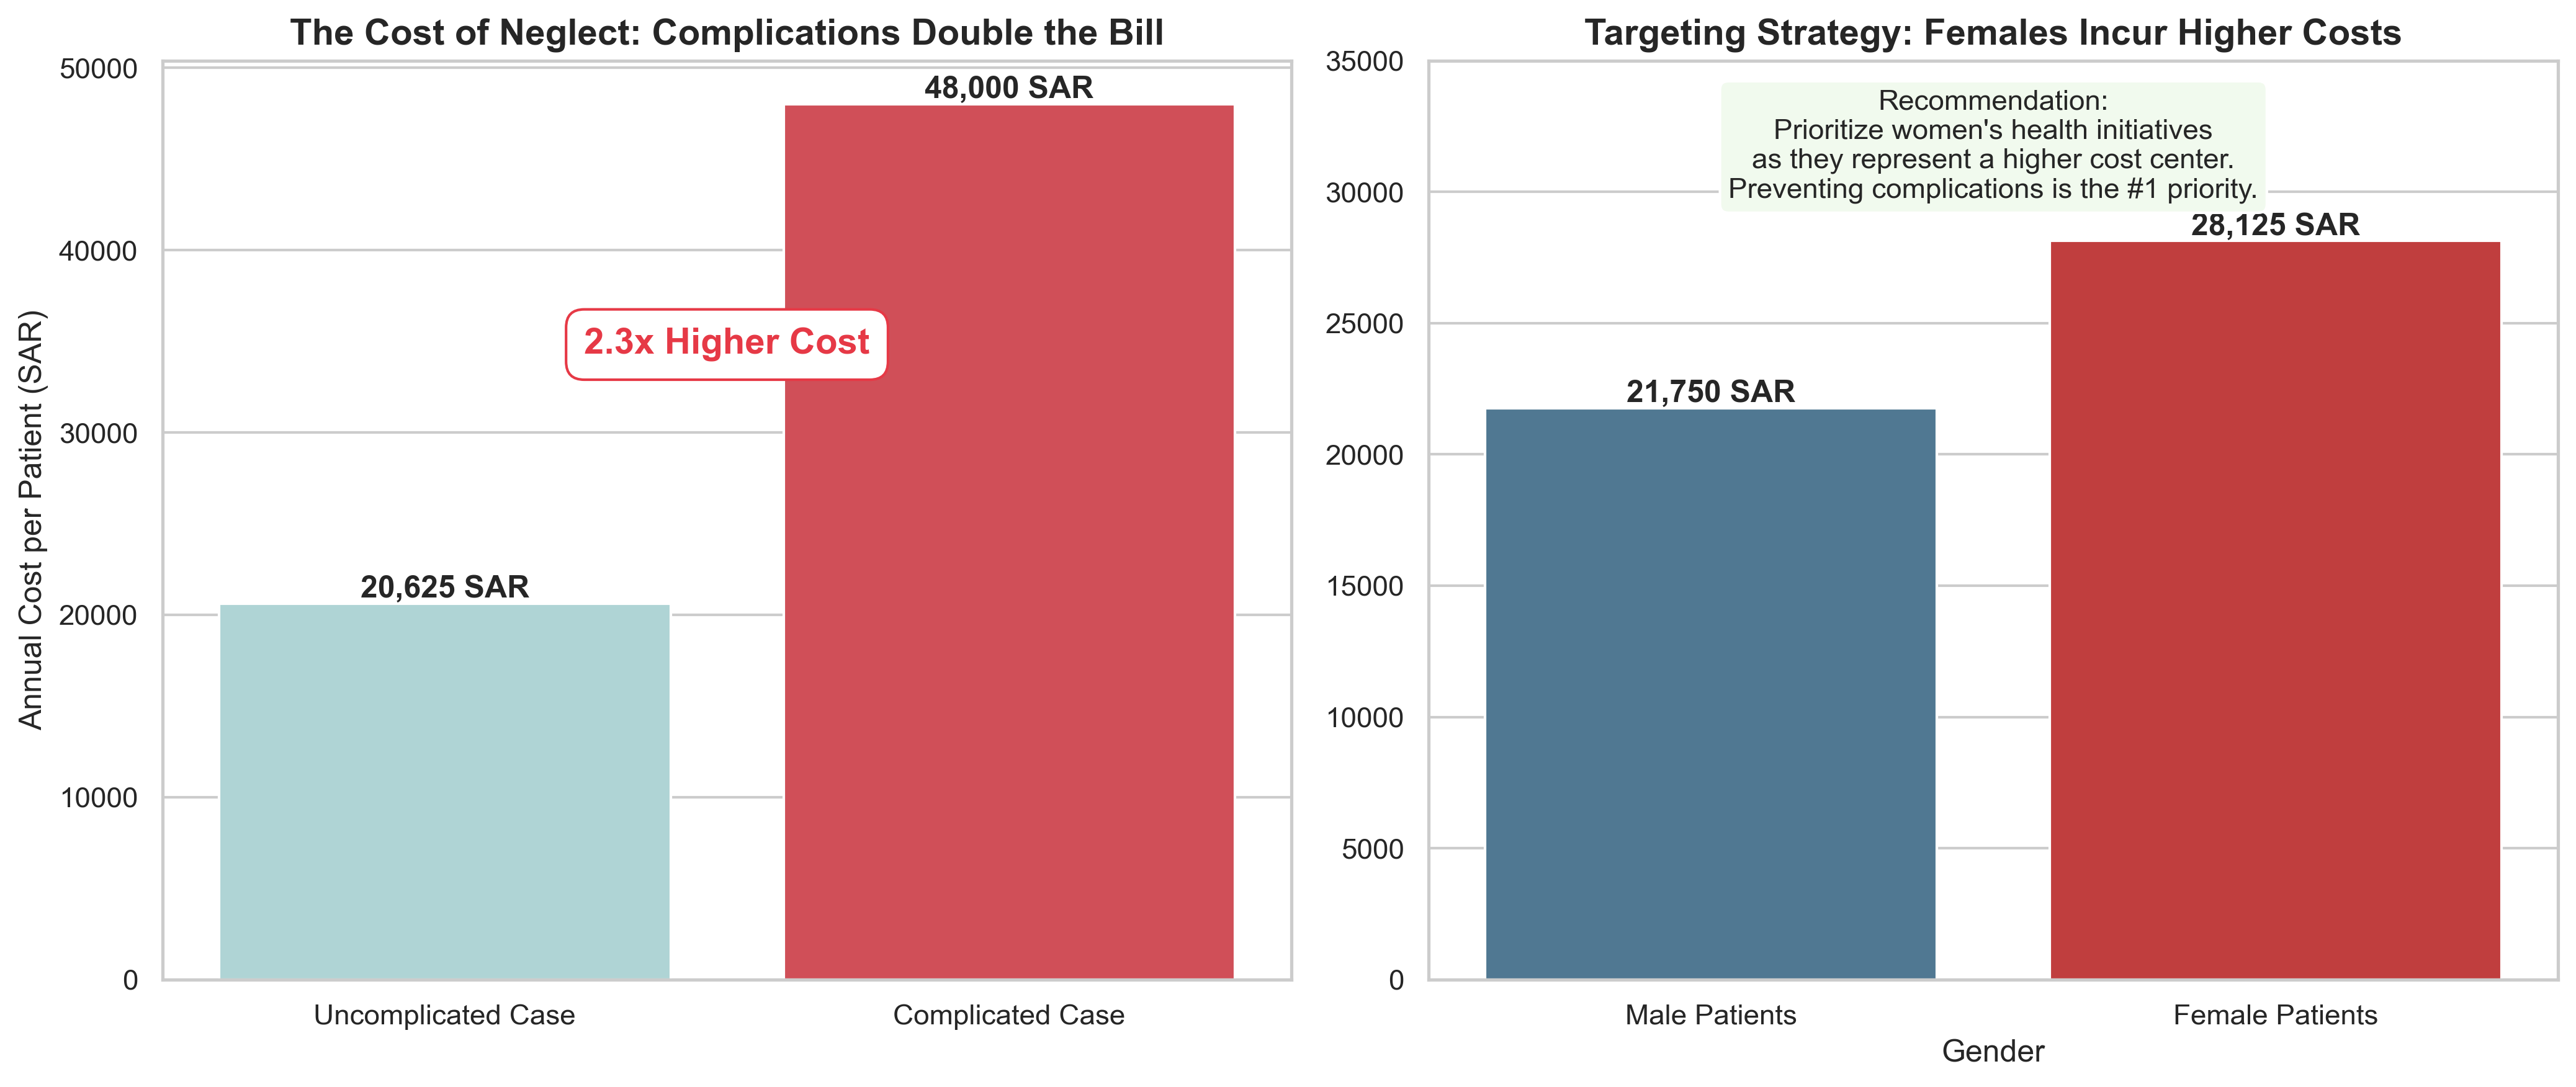

In [ ]:

sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'

def save_plot(filename):
    plt.tight_layout()
    plt.savefig(filename)
    print(f"   [Output] Chart saved as: {filename}")
    plt.close()

USD_TO_SAR = 3.75

print(">>> STEP 7: ANALYZING DEMOGRAPHICS & COMPLICATIONS...")

# المصدر: Alshammari et al. (Table 6)
# Uncomplicated: $5,500 | Complicated: $12,800
comp_data = {
    'Status': ['Uncomplicated Case', 'Complicated Case'],
    'Cost_USD': [5500, 12800]
}
df_comp_status = pd.DataFrame(comp_data)
df_comp_status['Cost_SAR'] = df_comp_status['Cost_USD'] * USD_TO_SAR


multiplier = df_comp_status.iloc[1]['Cost_SAR'] / df_comp_status.iloc[0]['Cost_SAR']


gender_data = {
    'Gender': ['Male Patients', 'Female Patients'],
    'Cost_USD': [5800, 7500]
}
df_gender = pd.DataFrame(gender_data)
df_gender['Cost_SAR'] = df_gender['Cost_USD'] * USD_TO_SAR


fig7, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

bars1 = sns.barplot(data=df_comp_status, x='Status', y='Cost_SAR', palette=['#a8dadc', '#e63946'], ax=ax1)

ax1.set_title('The Cost of Neglect: Complications Double the Bill', fontsize=14, fontweight='bold')
ax1.set_ylabel('Annual Cost per Patient (SAR)')
ax1.set_xlabel('')

start_h = df_comp_status.iloc[0]['Cost_SAR']
end_h = df_comp_status.iloc[1]['Cost_SAR']
ax1.annotate(f'{multiplier:.1f}x Higher Cost', 
             xy=(0.5, (start_h+end_h)/2), 
             ha='center', fontsize=14, fontweight='bold', color='#e63946',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='#e63946'))

for p in bars1.patches:
    ax1.annotate(f'{p.get_height():,.0f} SAR', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, weight='bold')


bars2 = sns.barplot(data=df_gender, x='Gender', y='Cost_SAR', palette=['#457b9d', '#d62828'], ax=ax2)

ax2.set_title('Targeting Strategy: Females Incur Higher Costs', fontsize=14, fontweight='bold')
ax2.set_ylabel('')
ax2.set_ylim(0, 35000)

for p in bars2.patches:
    ax2.annotate(f'{p.get_height():,.0f} SAR', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, weight='bold')

insight_text = ("Recommendation:\n"
                "Prioritize women's health initiatives\n"
                "as they represent a higher cost center.\n"
                "Preventing complications is the #1 priority.")
ax2.text(0.5, 0.85, insight_text, transform=ax2.transAxes, ha='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='#f1faee', alpha=1))

plt.tight_layout()
#save_plot('Page7_Targeting_Strategy.png')

print(f"   -> Complication Multiplier: {multiplier:.1f}x (Complicated cases are {multiplier:.1f} times more expensive).")
print(f"   -> Gender Gap: Treating females costs {df_gender.iloc[1]['Cost_SAR'] - df_gender.iloc[0]['Cost_SAR']:,.0f} SAR more per year.")